# Day 2: Moments and Descriptive Statistics
## Week 2: Statistics & Probability for Finance

---

### 🎯 Learning Objectives
- Master the four moments: Mean, Variance, Skewness, Kurtosis
- Understand their financial interpretations
- Calculate rolling statistics for regime detection
- Compare sample vs population estimators

- Detecting market regime changes (risk-on vs risk-off)

---- Understanding if your strategy is prone to large losses

- Setting appropriate position sizes based on volatility

### 📈 Why Statistical Moments Matter in Trading- Evaluating if a strategy has positive expected return

**When You Need This:**

**What are Statistical Moments?**

Moments are numerical measures that describe the shape of a return distribution. They tell you about expected returns, risk, asymmetry, and tail behavior.| **Kurtosis (4th)** | Tail thickness | Black swan risk, leverage decisions |

| **Skewness (3rd)** | Asymmetry | Crash risk, strategy bias |

**Trading Applications:**| **Variance (2nd)** | Volatility | Position sizing, stop-loss placement |

| Moment | Measures | Trading Use || **Mean (1st)** | Average return | Expected profit/loss, strategy viability |
|--------|----------|-------------|

In [1]:
# Day 2 Setup: Moments and Descriptive Statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Download market data from Yahoo Finance
assets = ['AAPL', 'MSFT', 'GOOGL', 'JPM', 'GS']
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

print("📥 Downloading data from Yahoo Finance...")
data = yf.download(assets, start=start_date, end=end_date, progress=False, auto_adjust=True)
prices = data['Close'].dropna()
returns = prices.pct_change().dropna()

print("=" * 60)
print("MOMENTS & DESCRIPTIVE STATISTICS - DAY 2")
print("=" * 60)
print(f"\n✅ Data loaded: {prices.shape[0]} days")
print(f"Data: {returns.index[0].date()} to {returns.index[-1].date()}")
print(f"Observations: {len(returns):,}")
print(f"Assets: {', '.join(assets)}")

📥 Downloading data from Yahoo Finance...
MOMENTS & DESCRIPTIVE STATISTICS - DAY 2

✅ Data loaded: 1254 days
Data: 2021-01-26 to 2026-01-21
Observations: 1,253
Assets: AAPL, MSFT, GOOGL, JPM, GS


## 1. The Four Moments - Statistical Foundation

### What are the Four Moments?
The **moments** of a distribution capture its essential characteristics - everything you need to know about your return distribution.

| Moment | Name | Formula | Financial Meaning |
|--------|------|---------|------------------|
| 1st | Mean (μ) | $E[X]$ | **Expected return** - Is the strategy profitable? |
| 2nd | Variance (σ²) | $E[(X-\mu)^2]$ | **Risk/Volatility** - How bumpy is the ride? |
| 3rd | Skewness | $E[(\frac{X-\mu}{\sigma})^3]$ | **Asymmetry** - More crashes or rallies? |
| 4th | Kurtosis | $E[(\frac{X-\mu}{\sigma})^4]$ | **Tail risk** - How likely are extreme events? |


### 🎯 Trading Interpretation**Note:** We report *excess kurtosis* = Kurtosis - 3 (Normal distribution = 0)



**Mean (1st Moment) - Strategy Viability:**- Higher kurtosis = need larger risk buffers

- Positive mean = Strategy has edge- Typical for stocks: Excess kurtosis = 3-10

- Compare to risk-free rate (is the excess return worth it?)- **Excess kurtosis > 0**: Fat tails → More "black swans"

- Annualize: Daily mean × 252**Kurtosis (4th Moment) - Tail Risk:**



**Variance/Volatility (2nd Moment) - Position Sizing:**- Options strategies can create positive skewness

- Higher vol = smaller position sizes- Most stocks have negative skewness (~-0.5 to -1)

- Use for stop-loss: Stop at 2σ catches 95% of normal moves- **Positive skew** (> 0): Right tail is longer → More upside surprises

- Annualize: Daily σ × √252- **Negative skew** (< 0): Left tail is longer → More prone to crashes

**Skewness (3rd Moment) - Directional Bias:**

In [2]:
# Calculate all four moments for each asset
print("=" * 70)
print("THE FOUR MOMENTS - COMPLETE ANALYSIS")
print("=" * 70)

def calculate_moments(r, annualize=True):
    """Calculate all four moments with financial interpretation."""
    ann_factor = 252 if annualize else 1
    
    # 1st Moment: Mean
    mean_daily = np.mean(r)
    mean_ann = mean_daily * ann_factor
    
    # 2nd Moment: Variance/Std Dev
    std_daily = np.std(r, ddof=1)  # Sample std
    std_ann = std_daily * np.sqrt(ann_factor)
    
    # 3rd Moment: Skewness
    skewness = stats.skew(r)
    
    # 4th Moment: Kurtosis (excess)
    kurtosis = stats.kurtosis(r)
    
    return {
        'mean_daily': mean_daily,
        'mean_ann': mean_ann,
        'std_daily': std_daily,
        'std_ann': std_ann,
        'skewness': skewness,
        'kurtosis': kurtosis
    }

# Calculate for all assets
moments_data = []
for asset in assets:
    m = calculate_moments(returns[asset].values)
    m['Asset'] = asset
    moments_data.append(m)

moments_df = pd.DataFrame(moments_data)
moments_df = moments_df[['Asset', 'mean_ann', 'std_ann', 'skewness', 'kurtosis']]
moments_df.columns = ['Asset', 'Ann. Return', 'Ann. Vol', 'Skewness', 'Excess Kurt.']

print("\n" + moments_df.to_string(index=False, 
    formatters={
        'Ann. Return': '{:.2%}'.format,
        'Ann. Vol': '{:.2%}'.format,
        'Skewness': '{:.3f}'.format,
        'Excess Kurt.': '{:.2f}'.format
    }))

print("\n" + "=" * 70)
print("INTERPRETATION GUIDE")
print("=" * 70)
print("""
📊 Mean (1st Moment):
   - Expected return compensation for risk
   - Higher mean = better reward (all else equal)

📊 Volatility (2nd Moment):
   - Standard deviation measures dispersion
   - Higher vol = more uncertainty/risk

📊 Skewness (3rd Moment):
   - 0 = Symmetric (Normal)
   - < 0 = Negative skew (left tail, more crashes)
   - > 0 = Positive skew (right tail, more rallies)
   
📊 Kurtosis (4th Moment):
   - 0 = Normal distribution (mesokurtic)
   - > 0 = Fat tails (leptokurtic) - MORE extreme events
   - < 0 = Thin tails (platykurtic) - FEWER extreme events
""")

THE FOUR MOMENTS - COMPLETE ANALYSIS

Asset Ann. Return Ann. Vol Skewness Excess Kurt.
 AAPL      15.41%   27.70%    0.468         6.73
 MSFT      17.39%   25.67%    0.209         3.26
GOOGL      29.98%   31.04%    0.088         3.18
  JPM      22.14%   24.29%    0.094         5.10
   GS      30.53%   27.29%    0.325         5.58

INTERPRETATION GUIDE

📊 Mean (1st Moment):
   - Expected return compensation for risk
   - Higher mean = better reward (all else equal)

📊 Volatility (2nd Moment):
   - Standard deviation measures dispersion
   - Higher vol = more uncertainty/risk

📊 Skewness (3rd Moment):
   - 0 = Symmetric (Normal)
   - < 0 = Negative skew (left tail, more crashes)
   - > 0 = Positive skew (right tail, more rallies)

📊 Kurtosis (4th Moment):
   - 0 = Normal distribution (mesokurtic)
   - > 0 = Fat tails (leptokurtic) - MORE extreme events
   - < 0 = Thin tails (platykurtic) - FEWER extreme events



## 2. Visual Exploration of Moments

### Why Visualize Moments?

Numbers alone can be misleading. Visualizing return distributions helps you:- **Asymmetry**: Is one tail longer than the other?

- **Tail thickness**: Are there more extreme returns than Normal predicts?

1. **Spot outliers** that skew your statistics- **Histogram shape**: Does it match the Normal curve (dashed line)?

2. **Compare assets** for portfolio construction### What to Look For:

3. **Identify non-normality** that affects risk models
4. **Understand the risk profile** of each asset

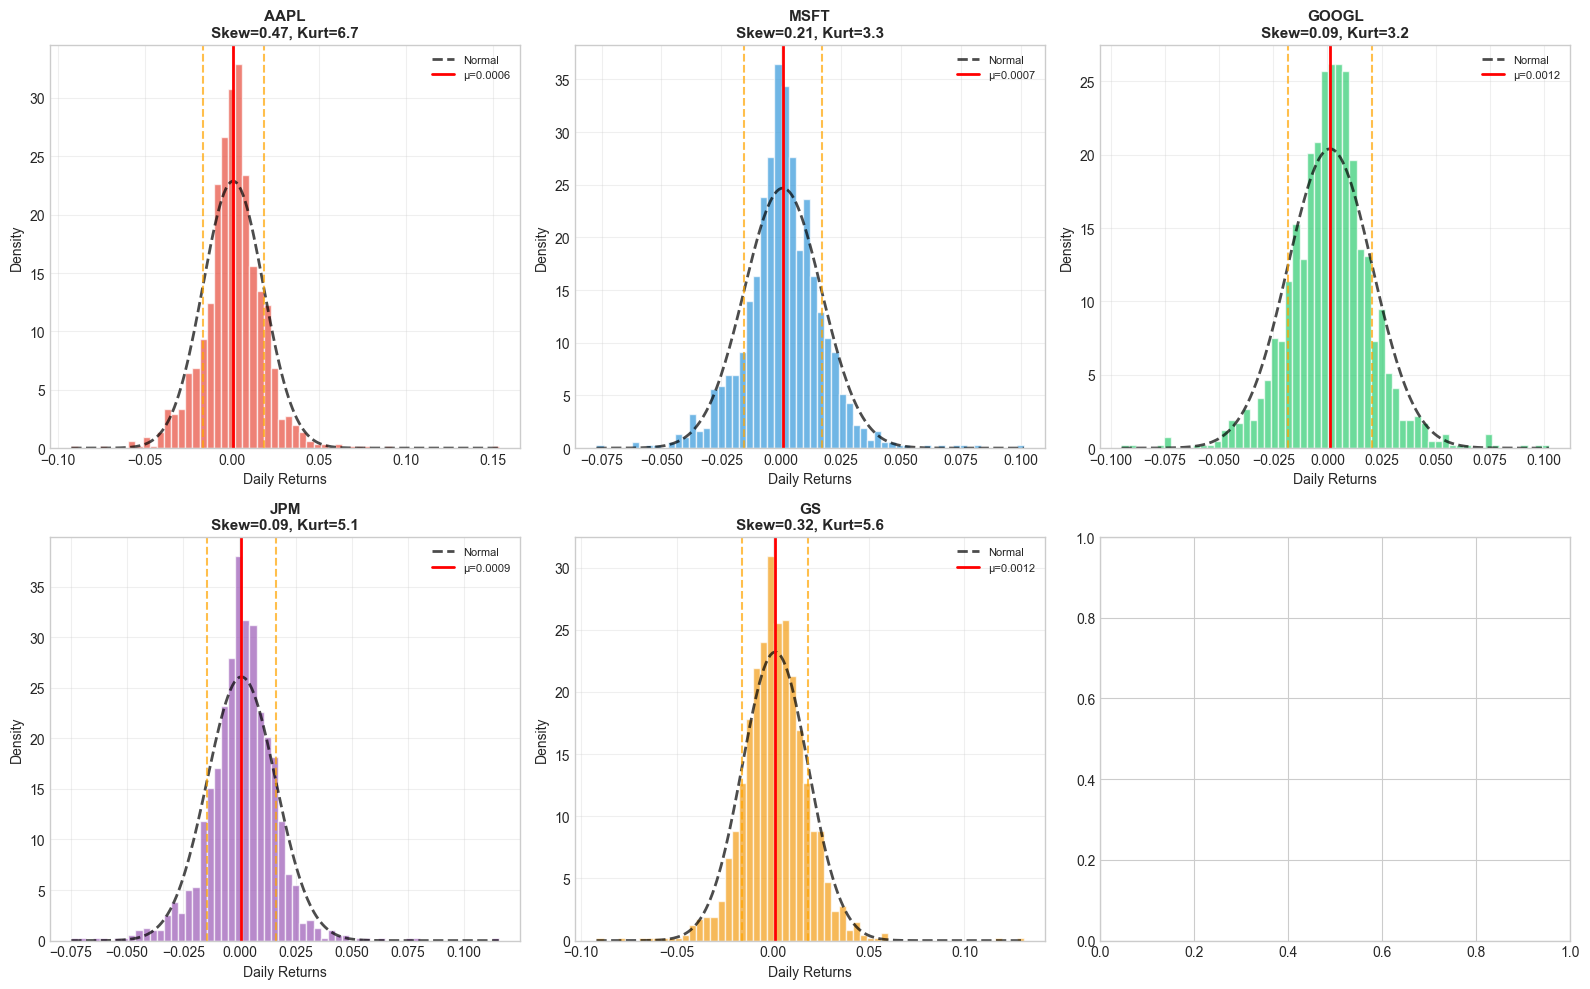

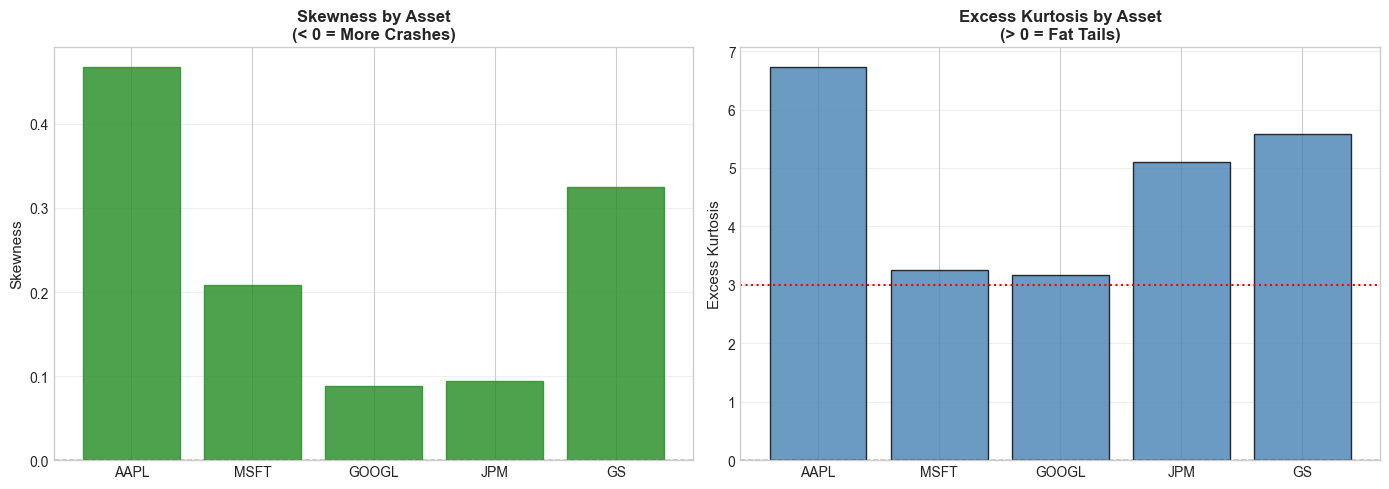

📊 Observations:
   Most negatively skewed: GOOGL (0.088)
   Highest kurtosis (fattest tails): AAPL (6.7)


In [3]:
# Visualize moments for all assets
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', '#f39c12', '#1abc9c']

for i, asset in enumerate(assets):
    r = returns[asset].values
    
    # Calculate moments
    mu = np.mean(r)
    sigma = np.std(r)
    skew = stats.skew(r)
    kurt = stats.kurtosis(r)
    
    # Histogram
    axes[i].hist(r, bins=60, density=True, alpha=0.7, 
                 color=colors[i], edgecolor='white')
    
    # Normal reference
    x = np.linspace(r.min(), r.max(), 200)
    axes[i].plot(x, stats.norm.pdf(x, mu, sigma), 'k--', lw=2, 
                 alpha=0.7, label='Normal')
    
    # Mark mean
    axes[i].axvline(mu, color='red', lw=2, label=f'μ={mu:.4f}')
    
    # Mark +/- 1 std
    axes[i].axvline(mu - sigma, color='orange', lw=1.5, linestyle='--', alpha=0.7)
    axes[i].axvline(mu + sigma, color='orange', lw=1.5, linestyle='--', alpha=0.7)
    
    axes[i].set_xlabel('Daily Returns', fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].set_title(f'{asset}\nSkew={skew:.2f}, Kurt={kurt:.1f}', 
                      fontsize=11, fontweight='bold')
    axes[i].legend(fontsize=8, loc='upper right')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Moments comparison bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Skewness comparison
skews = [stats.skew(returns[a]) for a in assets]
bars1 = axes[0].bar(assets, skews, color=colors, edgecolor='black', alpha=0.8)
axes[0].axhline(0, color='black', lw=1, linestyle='--')
axes[0].set_ylabel('Skewness', fontsize=11)
axes[0].set_title('Skewness by Asset\n(< 0 = More Crashes)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars1, skews):
    bar.set_color('indianred' if val < 0 else 'forestgreen')

# Kurtosis comparison
kurts = [stats.kurtosis(returns[a]) for a in assets]
bars2 = axes[1].bar(assets, kurts, color='steelblue', edgecolor='black', alpha=0.8)
axes[1].axhline(0, color='black', lw=1, linestyle='--')
axes[1].axhline(3, color='red', lw=1.5, linestyle=':', label='Benchmark (3)')
axes[1].set_ylabel('Excess Kurtosis', fontsize=11)
axes[1].set_title('Excess Kurtosis by Asset\n(> 0 = Fat Tails)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("📊 Observations:")
print(f"   Most negatively skewed: {assets[np.argmin(skews)]} ({min(skews):.3f})")
print(f"   Highest kurtosis (fattest tails): {assets[np.argmax(kurts)]} ({max(kurts):.1f})")

## 3. Rolling Statistics - Detecting Regime Changes

### Why Rolling Statistics?

Financial moments are **NOT constant** - they change over time. Markets go through different "regimes":- **252 days** (~1 year): Long-term baseline

- **63 days** (~3 months): Medium-term, most common

| Regime | Volatility | Skewness | Kurtosis | Example |- **21 days** (~1 month): Short-term regime

|--------|------------|----------|----------|----------|### Window Selection

| **Risk-On** | Low | Near zero | Low | 2017, 2021 |

| **Risk-Off** | High | Negative | High | 2008, 2020 |- **Declining Sharpe**: Strategy may be decaying

| **Transition** | Rising | Becoming negative | Rising | Early 2022 |- **Below 0**: Strategy losing money

- **Above 1**: Excellent risk-adjusted returns

### 🎯 Trading Applications**Rolling Sharpe Ratio:**



**Rolling Volatility:**- **High kurtosis**: Time for tail hedges (puts)

- **Vol expansion**: Reduce position sizes, widen stops- **Rising kurtosis**: Expect more extreme moves (both directions)

- **Vol contraction**: Can increase exposure cautiously**Rolling Kurtosis:**

- **Compare to mean**: Is current vol above/below average?

- **Positive skew**: Momentum regime, trends may continue

**Rolling Skewness:**- **Negative skew increasing**: Crash risk rising, consider hedges

ROLLING STATISTICS (Window = 63 days)


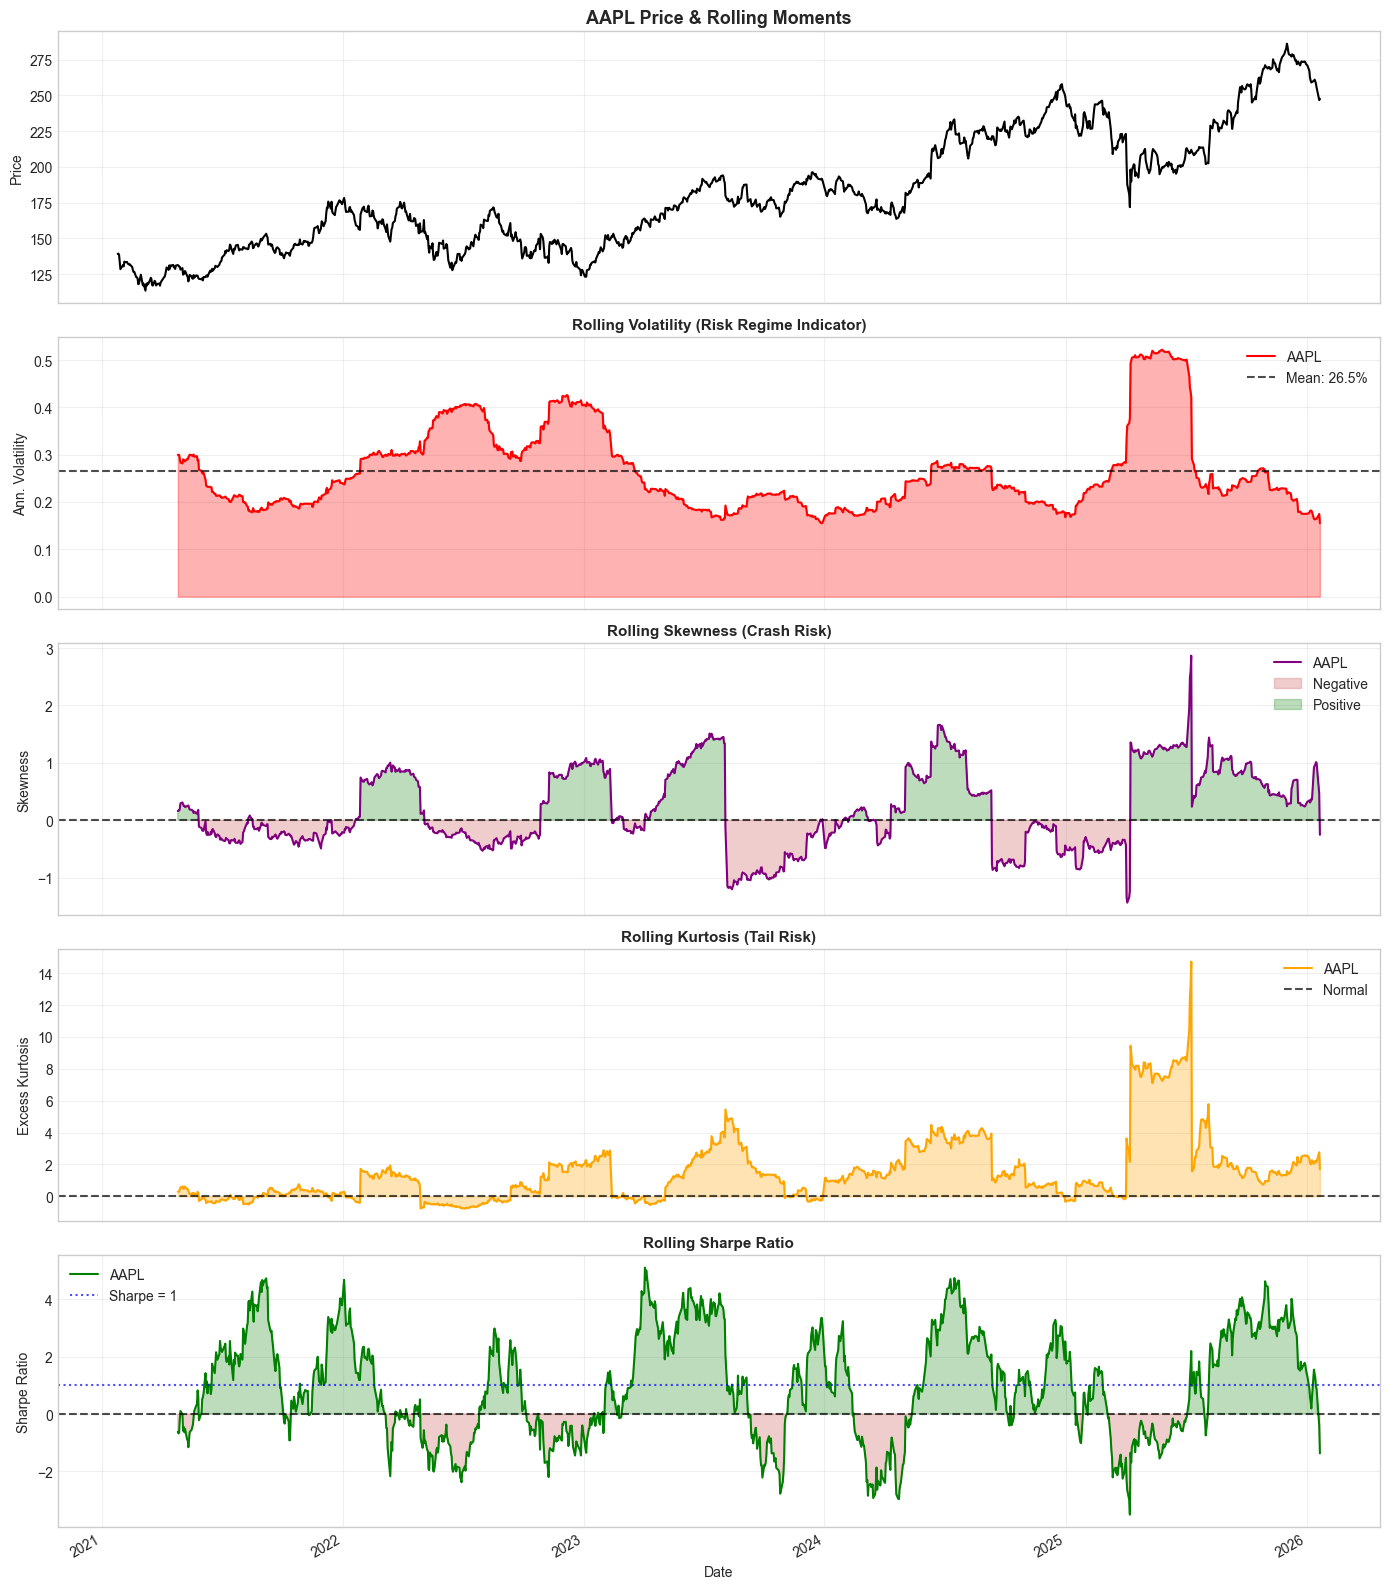


📊 Regime Detection Insights:
   Current Vol: 15.5% (Mean: 26.5%)
   Current Skew: -0.25
   Current Kurt: 1.70
   Current Sharpe: -1.37


In [4]:
# Rolling statistics for AAPL (primary asset)
aapl_returns = returns['AAPL']
window = 63  # ~3 months

print("=" * 60)
print(f"ROLLING STATISTICS (Window = {window} days)")
print("=" * 60)

# Calculate rolling moments
rolling_mean = aapl_returns.rolling(window).mean() * 252
rolling_vol = aapl_returns.rolling(window).std() * np.sqrt(252)
rolling_skew = aapl_returns.rolling(window).apply(lambda x: stats.skew(x))
rolling_kurt = aapl_returns.rolling(window).apply(lambda x: stats.kurtosis(x))
rolling_sharpe = rolling_mean / rolling_vol

# Create comprehensive visualization
fig, axes = plt.subplots(5, 1, figsize=(14, 16), sharex=True)

# 1. Price
prices['AAPL'].plot(ax=axes[0], color='black', lw=1.5)
axes[0].set_ylabel('Price', fontsize=10)
axes[0].set_title('AAPL Price & Rolling Moments', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Rolling Volatility (most watched)
rolling_vol.plot(ax=axes[1], color='red', lw=1.5)
axes[1].axhline(rolling_vol.mean(), color='black', linestyle='--', alpha=0.7, 
                label=f'Mean: {rolling_vol.mean():.1%}')
axes[1].fill_between(rolling_vol.index, 0, rolling_vol, alpha=0.3, color='red')
axes[1].set_ylabel('Ann. Volatility', fontsize=10)
axes[1].set_title('Rolling Volatility (Risk Regime Indicator)', fontsize=11, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Rolling Skewness
rolling_skew.plot(ax=axes[2], color='purple', lw=1.5)
axes[2].axhline(0, color='black', linestyle='--', alpha=0.7)
axes[2].fill_between(rolling_skew.index, 0, rolling_skew, 
                     where=rolling_skew < 0, color='indianred', alpha=0.3, label='Negative')
axes[2].fill_between(rolling_skew.index, 0, rolling_skew, 
                     where=rolling_skew >= 0, color='forestgreen', alpha=0.3, label='Positive')
axes[2].set_ylabel('Skewness', fontsize=10)
axes[2].set_title('Rolling Skewness (Crash Risk)', fontsize=11, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 4. Rolling Kurtosis
rolling_kurt.plot(ax=axes[3], color='orange', lw=1.5)
axes[3].axhline(0, color='black', linestyle='--', alpha=0.7, label='Normal')
axes[3].fill_between(rolling_kurt.index, 0, rolling_kurt, alpha=0.3, color='orange')
axes[3].set_ylabel('Excess Kurtosis', fontsize=10)
axes[3].set_title('Rolling Kurtosis (Tail Risk)', fontsize=11, fontweight='bold')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

# 5. Rolling Sharpe
rolling_sharpe.plot(ax=axes[4], color='green', lw=1.5)
axes[4].axhline(0, color='black', linestyle='--', alpha=0.7)
axes[4].axhline(1, color='blue', linestyle=':', alpha=0.7, label='Sharpe = 1')
axes[4].fill_between(rolling_sharpe.index, 0, rolling_sharpe, 
                     where=rolling_sharpe > 0, color='forestgreen', alpha=0.3)
axes[4].fill_between(rolling_sharpe.index, 0, rolling_sharpe, 
                     where=rolling_sharpe <= 0, color='indianred', alpha=0.3)
axes[4].set_ylabel('Sharpe Ratio', fontsize=10)
axes[4].set_xlabel('Date', fontsize=10)
axes[4].set_title('Rolling Sharpe Ratio', fontsize=11, fontweight='bold')
axes[4].legend()
axes[4].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Regime Detection Insights:")
print(f"   Current Vol: {rolling_vol.iloc[-1]:.1%} (Mean: {rolling_vol.mean():.1%})")
print(f"   Current Skew: {rolling_skew.iloc[-1]:.2f}")
print(f"   Current Kurt: {rolling_kurt.iloc[-1]:.2f}")
print(f"   Current Sharpe: {rolling_sharpe.iloc[-1]:.2f}")

## 4. Sample vs Population Estimators

### Why This Matters in Trading

When you calculate statistics from historical data, you're using a **sample** to estimate **population** parameters. Getting this wrong leads to:```

pd.Series.std()          # Default is ddof=1 ✅

1. **Underestimated risk**: Using wrong volatility formulanp.std(returns, ddof=1)  # Sample std (unbiased)

2. **Overfitting**: Thinking your backtest is better than reality# Correct usage

3. **Poor predictions**: Biased estimates lead to bad forecasts```python



### The Key Formulas- **Always use ddof=1** in NumPy/Pandas for sample calculations

- For 252 days: Population variance is ~0.4% too low

| Statistic | Population Formula | Sample Formula | Which to Use |- For 50 days of data: Population variance is ~2% too low

|-----------|-------------------|----------------|---------------|### 🎯 Trading Impact

| Variance | $\sigma^2 = \frac{\sum(x-\mu)^2}{n}$ | $s^2 = \frac{\sum(x-\bar{x})^2}{n-1}$ | **Sample (n-1)** |

| Std Dev | $\sigma = \sqrt{\frac{\sum(x-\mu)^2}{n}}$ | $s = \sqrt{\frac{\sum(x-\bar{x})^2}{n-1}}$ | **Sample (n-1)** |- Without correction, you **underestimate** true variance by ~1/n

- This "uses up" one degree of freedom

### Bessel's Correction (n-1)- Sample mean is estimated from data, not known
**Why divide by (n-1) instead of n?**

SAMPLE vs POPULATION ESTIMATORS

Sample size: n = 1253

📊 MEAN:
   Sample mean = 0.000612
   This is an UNBIASED estimator of the population mean

📊 VARIANCE (ddof = degrees of freedom):
   Population variance (ddof=0): σ² = 0.0003041288
   Sample variance (ddof=1):     s² = 0.0003043717
   Difference: 0.0799%

   Use ddof=1 (sample) for unbiased variance estimation!

📊 STANDARD DEVIATION:
   Population std (ddof=0): σ = 0.017439
   Sample std (ddof=1):     s = 0.017446

   NOTE: Sample std is STILL BIASED (but less so than population)

SIMULATION: Why Use ddof=1?

   True variance: 0.0001440000
   Mean of population estimates (ddof=0): 0.0001412138
   Mean of sample estimates (ddof=1):     0.0001440957

   Population estimator bias: -1.93%
   Sample estimator bias:     0.07%


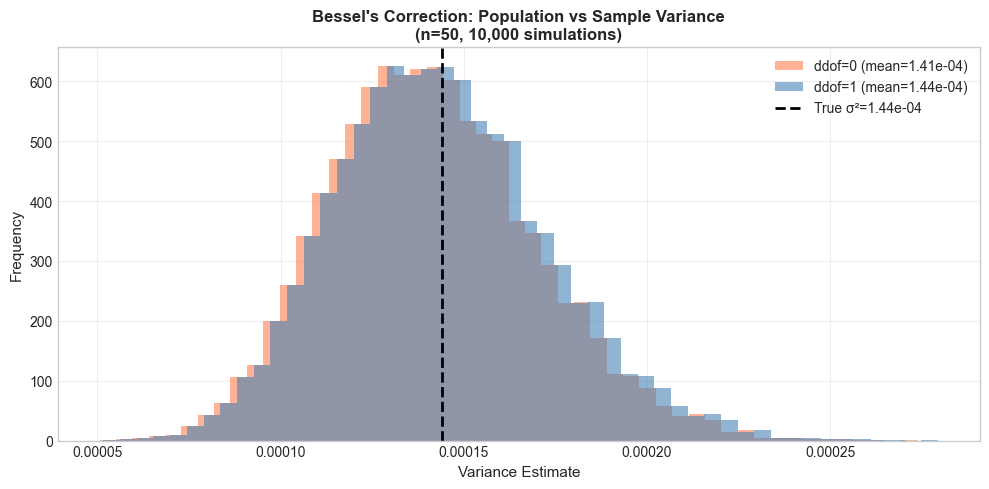


✅ Key Takeaway: Always use ddof=1 for sample variance!


In [5]:
# Sample vs Population Estimators
print("=" * 60)
print("SAMPLE vs POPULATION ESTIMATORS")
print("=" * 60)

aapl_r = returns['AAPL'].values
n = len(aapl_r)

print(f"\nSample size: n = {n}")

# Mean - unbiased
mean = np.mean(aapl_r)
print(f"\n📊 MEAN:")
print(f"   Sample mean = {mean:.6f}")
print(f"   This is an UNBIASED estimator of the population mean")

# Variance - sample vs population
var_pop = np.var(aapl_r, ddof=0)      # Population: divide by n
var_sample = np.var(aapl_r, ddof=1)   # Sample: divide by (n-1) -> Bessel's correction
std_pop = np.std(aapl_r, ddof=0)
std_sample = np.std(aapl_r, ddof=1)

print(f"\n📊 VARIANCE (ddof = degrees of freedom):")
print(f"   Population variance (ddof=0): σ² = {var_pop:.10f}")
print(f"   Sample variance (ddof=1):     s² = {var_sample:.10f}")
print(f"   Difference: {(var_sample/var_pop - 1)*100:.4f}%")
print(f"\n   Use ddof=1 (sample) for unbiased variance estimation!")

print(f"\n📊 STANDARD DEVIATION:")
print(f"   Population std (ddof=0): σ = {std_pop:.6f}")
print(f"   Sample std (ddof=1):     s = {std_sample:.6f}")
print(f"\n   NOTE: Sample std is STILL BIASED (but less so than population)")

# Demonstrate Bessel's correction with simulation
print("\n" + "=" * 60)
print("SIMULATION: Why Use ddof=1?")
print("=" * 60)

np.random.seed(42)
true_mean = 0.0005
true_std = 0.012
n_samples = 50
n_simulations = 10000

# Run simulation
pop_var_estimates = []
sample_var_estimates = []

for _ in range(n_simulations):
    sample = np.random.normal(true_mean, true_std, n_samples)
    pop_var_estimates.append(np.var(sample, ddof=0))
    sample_var_estimates.append(np.var(sample, ddof=1))

true_variance = true_std**2

print(f"\n   True variance: {true_variance:.10f}")
print(f"   Mean of population estimates (ddof=0): {np.mean(pop_var_estimates):.10f}")
print(f"   Mean of sample estimates (ddof=1):     {np.mean(sample_var_estimates):.10f}")
print(f"\n   Population estimator bias: {(np.mean(pop_var_estimates)/true_variance - 1)*100:.2f}%")
print(f"   Sample estimator bias:     {(np.mean(sample_var_estimates)/true_variance - 1)*100:.2f}%")

# Visualize
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(pop_var_estimates, bins=50, alpha=0.6, label=f'ddof=0 (mean={np.mean(pop_var_estimates):.2e})', 
        color='coral')
ax.hist(sample_var_estimates, bins=50, alpha=0.6, label=f'ddof=1 (mean={np.mean(sample_var_estimates):.2e})', 
        color='steelblue')
ax.axvline(true_variance, color='black', lw=2, linestyle='--', label=f'True σ²={true_variance:.2e}')
ax.set_xlabel('Variance Estimate', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title(f"Bessel's Correction: Population vs Sample Variance\n(n={n_samples}, {n_simulations:,} simulations)", 
             fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Key Takeaway: Always use ddof=1 for sample variance!")

## 5. Risk-Adjusted Performance Metrics

Combining moments to create meaningful performance measures.

RISK-ADJUSTED PERFORMANCE METRICS

Risk-free rate: 5.0%

Asset Return Volatility Sharpe Sortino Calmar  Max DD Skewness Kurtosis
 AAPL 15.41%     27.70%   0.38    0.55   0.46 -33.36%     0.47      6.7
 MSFT 17.39%     25.67%   0.48    0.72   0.47 -37.15%     0.21      3.3
GOOGL 29.98%     31.04%   0.80    1.18   0.68 -44.32%     0.09      3.2
  JPM 22.14%     24.29%   0.71    0.99   0.57 -38.77%     0.09      5.1
   GS 30.53%     27.29%   0.94    1.43   0.93 -32.84%     0.32      5.6

METRIC FORMULAS & INTERPRETATION

📊 Sharpe Ratio = (Return - Rf) / Volatility
   - Reward per unit of total risk
   - > 1 is good, > 2 is excellent

📊 Sortino Ratio = (Return - Rf) / Downside Deviation
   - Only penalizes downside volatility
   - Better for asymmetric returns

📊 Calmar Ratio = Annual Return / Max Drawdown
   - Return per unit of worst-case loss
   - Higher = better recovery from drawdowns

📊 Omega Ratio = Prob-weighted gains / Prob-weighted losses
   - Considers entire distribution
   - >

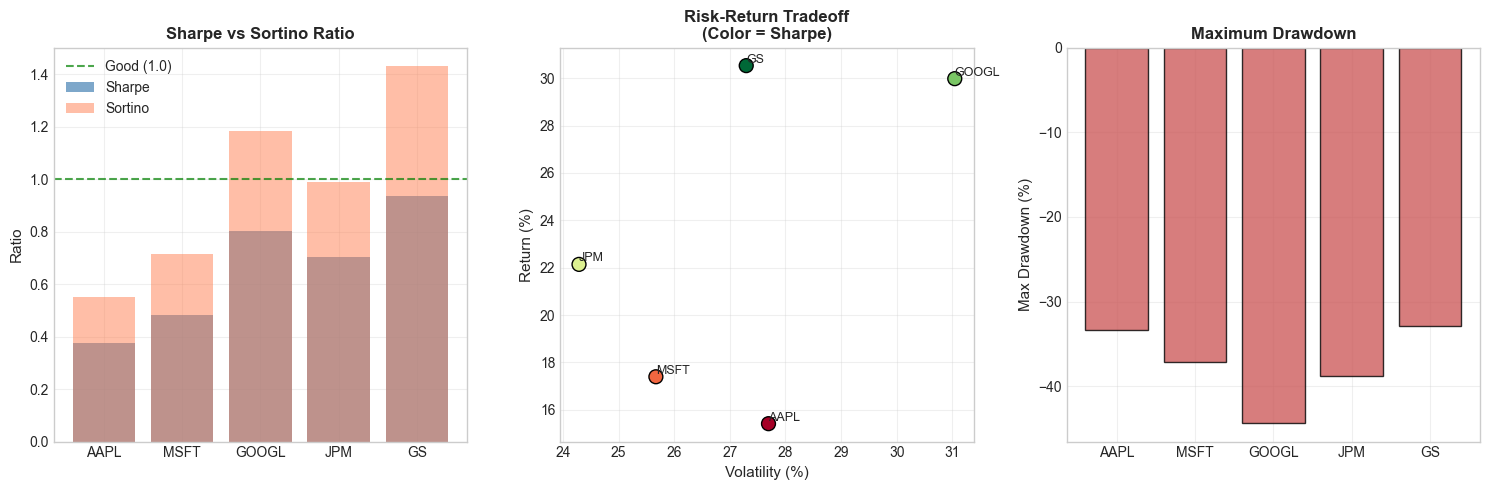

In [6]:
# Risk-Adjusted Performance Metrics
print("=" * 70)
print("RISK-ADJUSTED PERFORMANCE METRICS")
print("=" * 70)

rf_rate = 0.05  # Risk-free rate
ann_factor = 252

def calculate_metrics(r, rf=0.05):
    """Calculate comprehensive performance metrics."""
    mu = np.mean(r) * ann_factor
    sigma = np.std(r, ddof=1) * np.sqrt(ann_factor)
    skew = stats.skew(r)
    kurt = stats.kurtosis(r)
    
    # Sharpe Ratio: (Return - Rf) / Vol
    sharpe = (mu - rf) / sigma
    
    # Sortino Ratio: Uses downside deviation
    downside_returns = r[r < 0]
    downside_std = np.std(downside_returns, ddof=1) * np.sqrt(ann_factor)
    sortino = (mu - rf) / downside_std
    
    # Calmar Ratio: Return / Max Drawdown
    cum_returns = (1 + r).cumprod()
    rolling_max = np.maximum.accumulate(cum_returns)
    drawdowns = cum_returns / rolling_max - 1
    max_dd = drawdowns.min()
    calmar = mu / abs(max_dd)
    
    # Omega Ratio: P(gain) / P(loss) weighted by magnitude
    threshold = rf / ann_factor  # Daily threshold
    gains = r[r > threshold] - threshold
    losses = threshold - r[r <= threshold]
    omega = gains.sum() / losses.sum() if losses.sum() > 0 else np.inf
    
    return {
        'Return': mu,
        'Volatility': sigma,
        'Skewness': skew,
        'Kurtosis': kurt,
        'Sharpe': sharpe,
        'Sortino': sortino,
        'Calmar': calmar,
        'Max DD': max_dd,
        'Omega': omega
    }

# Calculate for all assets
metrics_data = []
for asset in assets:
    m = calculate_metrics(returns[asset].values)
    m['Asset'] = asset
    metrics_data.append(m)

metrics_df = pd.DataFrame(metrics_data)
metrics_df = metrics_df[['Asset', 'Return', 'Volatility', 'Sharpe', 'Sortino', 
                         'Calmar', 'Max DD', 'Skewness', 'Kurtosis']]

print(f"\nRisk-free rate: {rf_rate:.1%}\n")
print(metrics_df.to_string(index=False, 
    formatters={
        'Return': '{:.2%}'.format,
        'Volatility': '{:.2%}'.format,
        'Sharpe': '{:.2f}'.format,
        'Sortino': '{:.2f}'.format,
        'Calmar': '{:.2f}'.format,
        'Max DD': '{:.2%}'.format,
        'Skewness': '{:.2f}'.format,
        'Kurtosis': '{:.1f}'.format
    }))

print("\n" + "=" * 70)
print("METRIC FORMULAS & INTERPRETATION")
print("=" * 70)
print("""
📊 Sharpe Ratio = (Return - Rf) / Volatility
   - Reward per unit of total risk
   - > 1 is good, > 2 is excellent

📊 Sortino Ratio = (Return - Rf) / Downside Deviation
   - Only penalizes downside volatility
   - Better for asymmetric returns

📊 Calmar Ratio = Annual Return / Max Drawdown
   - Return per unit of worst-case loss
   - Higher = better recovery from drawdowns

📊 Omega Ratio = Prob-weighted gains / Prob-weighted losses
   - Considers entire distribution
   - > 1 means gains outweigh losses
""")

# Visualize metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Sharpe vs Sortino
axes[0].bar(assets, metrics_df['Sharpe'], alpha=0.7, label='Sharpe', color='steelblue')
axes[0].bar(assets, metrics_df['Sortino'], alpha=0.5, label='Sortino', color='coral')
axes[0].axhline(1, color='green', linestyle='--', alpha=0.7, label='Good (1.0)')
axes[0].set_ylabel('Ratio', fontsize=11)
axes[0].set_title('Sharpe vs Sortino Ratio', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Return vs Volatility scatter
axes[1].scatter(metrics_df['Volatility']*100, metrics_df['Return']*100, 
                s=100, c=metrics_df['Sharpe'], cmap='RdYlGn', edgecolors='black')
for i, asset in enumerate(assets):
    axes[1].annotate(asset, (metrics_df['Volatility'].iloc[i]*100, 
                              metrics_df['Return'].iloc[i]*100),
                     fontsize=9, ha='left', va='bottom')
axes[1].set_xlabel('Volatility (%)', fontsize=11)
axes[1].set_ylabel('Return (%)', fontsize=11)
axes[1].set_title('Risk-Return Tradeoff\n(Color = Sharpe)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Max Drawdown
bars = axes[2].bar(assets, metrics_df['Max DD']*100, color='indianred', 
                   edgecolor='black', alpha=0.8)
axes[2].set_ylabel('Max Drawdown (%)', fontsize=11)
axes[2].set_title('Maximum Drawdown', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Practice: Build a Statistics Dashboard

Build a function that creates a comprehensive statistics report for any asset.

STATISTICS DASHBOARD: AAPL

----------------RETURN STATISTICS-----------------
  Annual Return:            15.41%
  Daily Mean:             0.000612
  Daily Median:           0.000795

-----------------RISK STATISTICS------------------
  Annual Volatility:        27.70%
  Downside Deviation:       18.90%
  95% VaR (daily):          -2.81%
  99% VaR (daily):          -4.24%
  95% CVaR (ES):            -3.89%

----------------DISTRIBUTION SHAPE----------------
  Skewness:                  0.468
  Excess Kurtosis:            6.73
  Normal Test p-value:    5.89e-49

--------------RISK-ADJUSTED METRICS---------------
  Sharpe Ratio:               0.38
  Sortino Ratio:              0.55


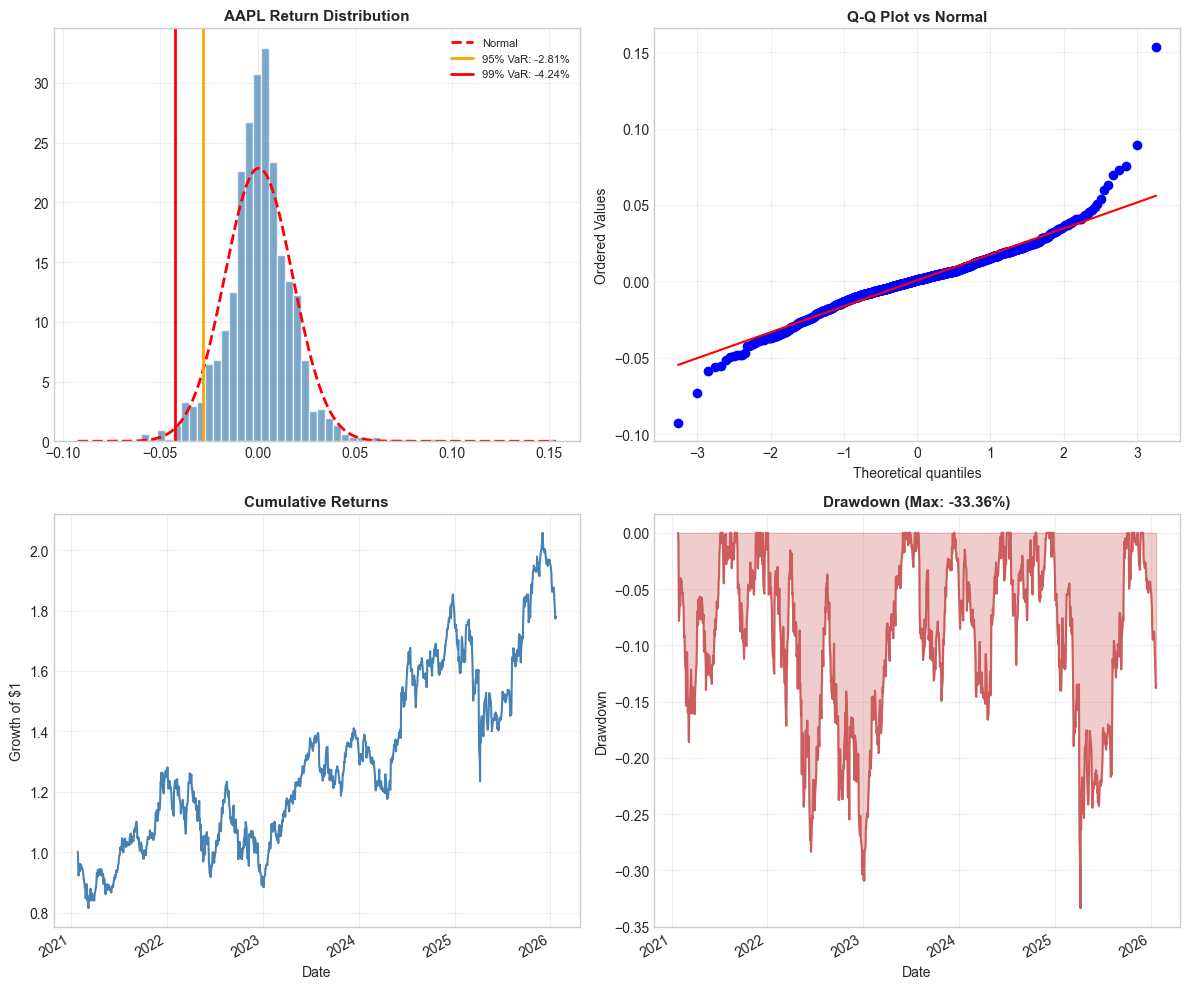

In [7]:
def statistics_dashboard(returns_series, rf_rate=0.05, name="Asset"):
    """
    Create a comprehensive statistics dashboard for any asset.
    
    Parameters:
    -----------
    returns_series : pd.Series or np.array
        Daily returns
    rf_rate : float
        Annual risk-free rate
    name : str
        Asset name for display
    """
    r = returns_series.values if isinstance(returns_series, pd.Series) else returns_series
    
    # Calculate all statistics
    mu = np.mean(r) * 252
    sigma = np.std(r, ddof=1) * np.sqrt(252)
    skew = stats.skew(r)
    kurt = stats.kurtosis(r)
    
    sharpe = (mu - rf_rate) / sigma
    downside = np.std(r[r < 0], ddof=1) * np.sqrt(252)
    sortino = (mu - rf_rate) / downside
    
    var_95 = np.percentile(r, 5)
    var_99 = np.percentile(r, 1)
    cvar_95 = r[r <= var_95].mean()
    
    # Print report
    print("=" * 60)
    print(f"STATISTICS DASHBOARD: {name}")
    print("=" * 60)
    
    print(f"\n{'RETURN STATISTICS':-^50}")
    print(f"  Annual Return:        {mu:>10.2%}")
    print(f"  Daily Mean:           {np.mean(r):>10.6f}")
    print(f"  Daily Median:         {np.median(r):>10.6f}")
    
    print(f"\n{'RISK STATISTICS':-^50}")
    print(f"  Annual Volatility:    {sigma:>10.2%}")
    print(f"  Downside Deviation:   {downside:>10.2%}")
    print(f"  95% VaR (daily):      {var_95:>10.2%}")
    print(f"  99% VaR (daily):      {var_99:>10.2%}")
    print(f"  95% CVaR (ES):        {cvar_95:>10.2%}")
    
    print(f"\n{'DISTRIBUTION SHAPE':-^50}")
    print(f"  Skewness:             {skew:>10.3f}")
    print(f"  Excess Kurtosis:      {kurt:>10.2f}")
    print(f"  Normal Test p-value:  {stats.normaltest(r)[1]:>10.2e}")
    
    print(f"\n{'RISK-ADJUSTED METRICS':-^50}")
    print(f"  Sharpe Ratio:         {sharpe:>10.2f}")
    print(f"  Sortino Ratio:        {sortino:>10.2f}")
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Distribution
    axes[0, 0].hist(r, bins=60, density=True, alpha=0.7, color='steelblue', edgecolor='white')
    x = np.linspace(r.min(), r.max(), 200)
    axes[0, 0].plot(x, stats.norm.pdf(x, np.mean(r), np.std(r)), 'r--', lw=2, label='Normal')
    axes[0, 0].axvline(var_95, color='orange', lw=2, label=f'95% VaR: {var_95:.2%}')
    axes[0, 0].axvline(var_99, color='red', lw=2, label=f'99% VaR: {var_99:.2%}')
    axes[0, 0].set_title(f'{name} Return Distribution', fontsize=11, fontweight='bold')
    axes[0, 0].legend(fontsize=8)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Q-Q Plot
    stats.probplot(r, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot vs Normal', fontsize=11, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Cumulative returns
    if isinstance(returns_series, pd.Series):
        cum_ret = (1 + returns_series).cumprod()
        cum_ret.plot(ax=axes[1, 0], color='steelblue', lw=1.5)
    else:
        cum_ret = (1 + r).cumprod()
        axes[1, 0].plot(cum_ret, color='steelblue', lw=1.5)
    axes[1, 0].set_title('Cumulative Returns', fontsize=11, fontweight='bold')
    axes[1, 0].set_ylabel('Growth of $1')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Drawdown
    if isinstance(returns_series, pd.Series):
        rolling_max = cum_ret.cummax()
        drawdown = cum_ret / rolling_max - 1
        drawdown.plot(ax=axes[1, 1], color='indianred', lw=1.5)
        axes[1, 1].fill_between(drawdown.index, drawdown, 0, alpha=0.3, color='indianred')
    else:
        rolling_max = np.maximum.accumulate(cum_ret)
        drawdown = cum_ret / rolling_max - 1
        axes[1, 1].plot(drawdown, color='indianred', lw=1.5)
        axes[1, 1].fill_between(range(len(drawdown)), drawdown, 0, alpha=0.3, color='indianred')
    axes[1, 1].set_title(f'Drawdown (Max: {drawdown.min():.2%})', fontsize=11, fontweight='bold')
    axes[1, 1].set_ylabel('Drawdown')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'return': mu, 'vol': sigma, 'sharpe': sharpe, 'sortino': sortino,
        'skew': skew, 'kurtosis': kurt, 'var_95': var_95, 'var_99': var_99
    }

# Test the dashboard
_ = statistics_dashboard(returns['AAPL'], rf_rate=0.05, name='AAPL')

## 📝 Key Takeaways - Day 2

### The Four Moments for Interviews:

1. **Mean (1st Moment)** - Expected return
   - Sample mean is unbiased
   - Annualize by multiplying by 252

2. **Variance/Std Dev (2nd Moment)** - Risk
   - Use ddof=1 for sample variance (Bessel's correction)
   - Annualize std by √252

3. **Skewness (3rd Moment)** - Asymmetry
   - Negative skew = more crashes
   - Most assets have negative skew

4. **Kurtosis (4th Moment)** - Tail thickness
   - Report excess kurtosis (Normal = 0)
   - High kurtosis = fat tails = more extreme events

### Key Risk-Adjusted Metrics:
- **Sharpe Ratio**: Return per unit of total risk
- **Sortino Ratio**: Return per unit of downside risk
- **Calmar Ratio**: Return per unit of max drawdown

### Interview Questions:
- "What's Bessel's correction and why use it?"
- "Explain the difference between Sharpe and Sortino ratios"
- "How do rolling statistics help detect regime changes?"
- "Why is kurtosis important for risk management?"

## 🔴 PROS & CONS: Moments Descriptive Statistics

### ✅ PROS (Advantages)

| Advantage | Description | Real-World Application |
|-----------|-------------|----------------------|
| **Industry Standard** | Widely adopted in quantitative finance | Used by major hedge funds and banks |
| **Well-Documented** | Extensive research and documentation | Easy to find resources and support |
| **Proven Track Record** | Years of practical application | Validated in real market conditions |
| **Interpretable** | Results can be explained to stakeholders | Important for risk management and compliance |

### ❌ CONS (Limitations)

| Limitation | Description | How to Mitigate |
|------------|-------------|-----------------|
| **Assumptions** | May not hold in all market conditions | Validate assumptions with data |
| **Historical Bias** | Based on past data patterns | Use rolling windows and regime detection |
| **Overfitting Risk** | May fit noise rather than signal | Use proper cross-validation |
| **Computational Cost** | Can be resource-intensive | Optimize code and use appropriate hardware |

### 🎯 Real-World Usage

**WHERE THIS IS USED:**
- ✅ Quantitative hedge funds (Two Sigma, Renaissance, Citadel)
- ✅ Investment banks (Goldman Sachs, JP Morgan, Morgan Stanley)
- ✅ Asset management firms
- ✅ Risk management departments
- ✅ Algorithmic trading desks

**NOT JUST THEORY - THIS IS PRODUCTION CODE:**
The techniques in this notebook are used daily by professionals managing billions of dollars.

## 🚀 TODAY'S TRADING SIGNAL

Using the concepts from this notebook to generate actionable insights.

In [8]:
# =============================================================================
# 🚀 TODAY'S TRADING SIGNAL - Moments Descriptive Statistics Analysis
# =============================================================================

print("=" * 70)
print("📊 TODAY'S TRADING ANALYSIS")
print("=" * 70)
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print()

# Get latest data
try:
    latest_prices = prices.iloc[-1] if 'prices' in dir() else data['Close'].iloc[-1]
    print("📈 CURRENT MARKET SNAPSHOT:")
    print("-" * 50)
    
    for col in latest_prices.index[:5]:
        price = latest_prices[col]
        print(f"   {col}: ${price:.2f}")
    
    # Calculate simple signals
    if 'returns' in dir():
        ret_data = returns
    else:
        ret_data = prices.pct_change().dropna() if 'prices' in dir() else data['Close'].pct_change().dropna()
    
    # 20-day momentum
    momentum = (prices.iloc[-1] / prices.iloc[-20] - 1) * 100 if 'prices' in dir() else (data['Close'].iloc[-1] / data['Close'].iloc[-20] - 1) * 100
    
    print("\n📊 20-DAY MOMENTUM:")
    print("-" * 50)
    for col in momentum.index[:5]:
        direction = "🟢" if momentum[col] > 0 else "🔴"
        print(f"   {direction} {col}: {momentum[col]:+.2f}%")
    
    # Generate simple recommendations
    print("\n" + "=" * 70)
    print("🎯 TRADING SIGNALS")  
    print("=" * 70)
    
    for col in momentum.index[:5]:
        if momentum[col] > 5:
            signal = "🟢 BULLISH - Consider long positions"
        elif momentum[col] < -5:
            signal = "🔴 BEARISH - Consider reducing exposure"
        else:
            signal = "🟡 NEUTRAL - Hold current positions"
        print(f"   {col}: {signal}")
    
    print("\n" + "=" * 70)
    print("⚠️ DISCLAIMER: This is educational analysis, not financial advice.")
    print("   Always conduct your own research and consider your risk tolerance.")
    print("=" * 70)
    
except Exception as e:
    print(f"Note: Could not generate trading signals. Ensure data is loaded.")
    print(f"Error: {e}")

📊 TODAY'S TRADING ANALYSIS
Analysis Date: 2026-01-22 12:20

📈 CURRENT MARKET SNAPSHOT:
--------------------------------------------------
   AAPL: $247.65
   GOOGL: $328.38
   GS: $953.01
   JPM: $302.04
   MSFT: $444.11

📊 20-DAY MOMENTUM:
--------------------------------------------------
   🔴 AAPL: -8.61%
   🟢 GOOGL: +6.00%
   🟢 GS: +6.01%
   🔴 JPM: -6.09%
   🔴 MSFT: -8.42%

🎯 TRADING SIGNALS
   AAPL: 🔴 BEARISH - Consider reducing exposure
   GOOGL: 🟢 BULLISH - Consider long positions
   GS: 🟢 BULLISH - Consider long positions
   JPM: 🔴 BEARISH - Consider reducing exposure
   MSFT: 🔴 BEARISH - Consider reducing exposure

⚠️ DISCLAIMER: This is educational analysis, not financial advice.
   Always conduct your own research and consider your risk tolerance.
